# Boston Housing

## Import libraries and dataset

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [34]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
data.shape

(506, 14)

## Missing Values

In [30]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- Tidak ada missing values

## Outliers Checking

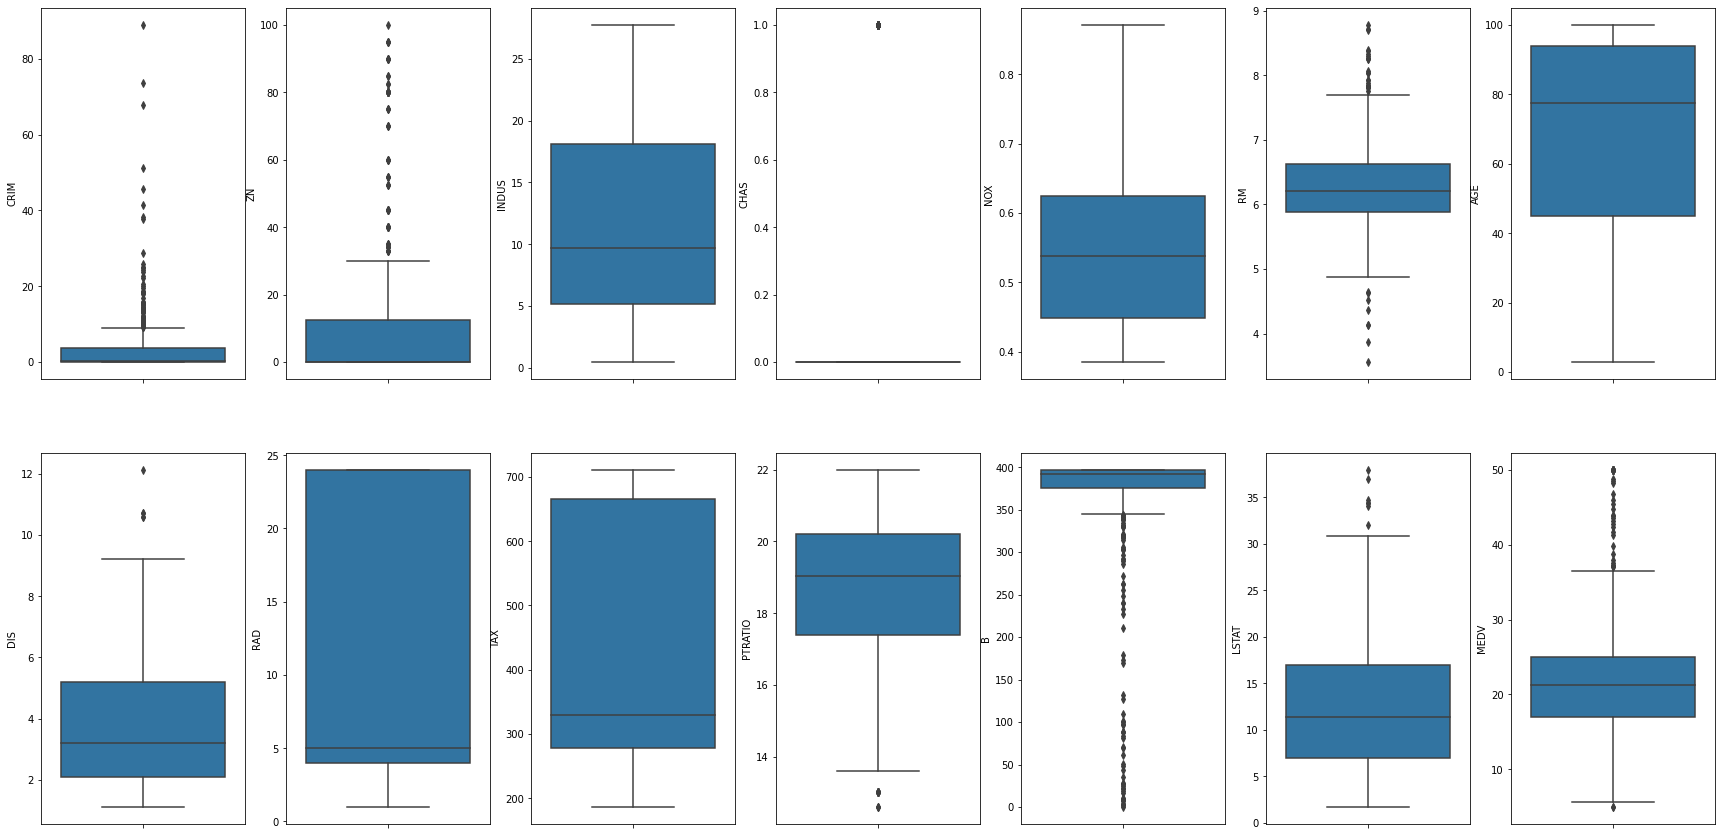

In [36]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30,15))
idx = 0
ax = ax.flatten()
for i,j in data.items():
    sns.boxplot(y=i, data=data, ax=ax[idx])
    idx+=1
plt.show()

- Disini terdapat banyak outliers seperti column CRIM, ZN, RM dan B, dan Target variable kita MEDV

### Removing outliers on Target Variables

In [37]:
data = data[data['MEDV'] <= 40.0]

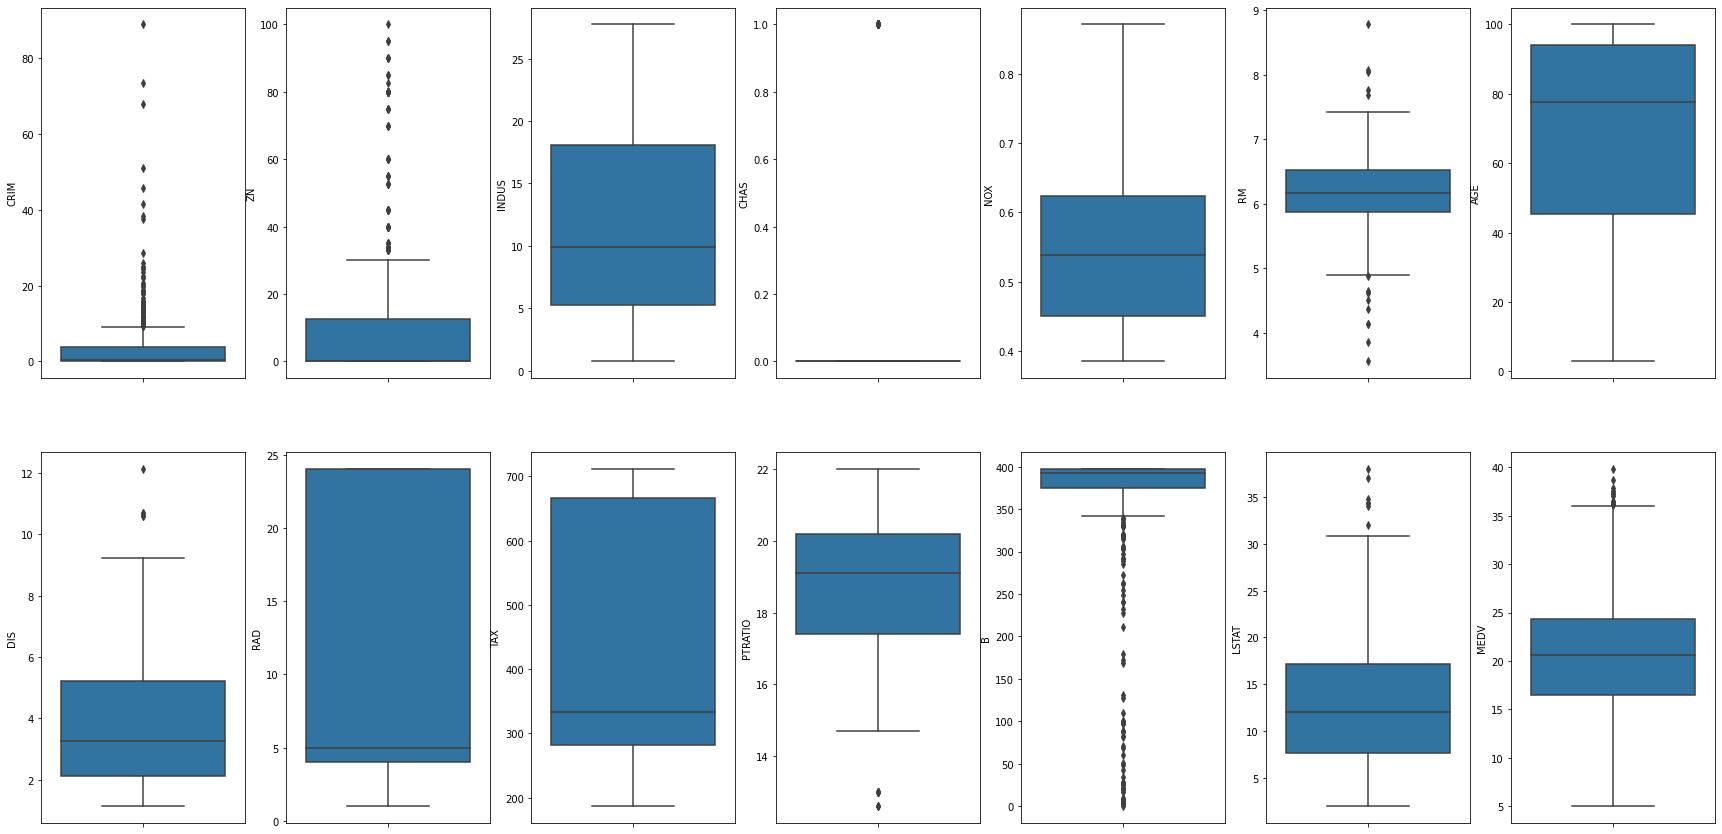

In [38]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(30,15))
idx = 0
ax = ax.flatten()
for i,j in data.items():
    sns.boxplot(y=i, data=data, ax=ax[idx])
    idx+=1
plt.show()

- Disini kita mengambil data yang nilai MEDV kurang dari sama dengan 40 untuk mengurangi outliers.

In [40]:
data = data[data['MEDV'] <= 40.0]

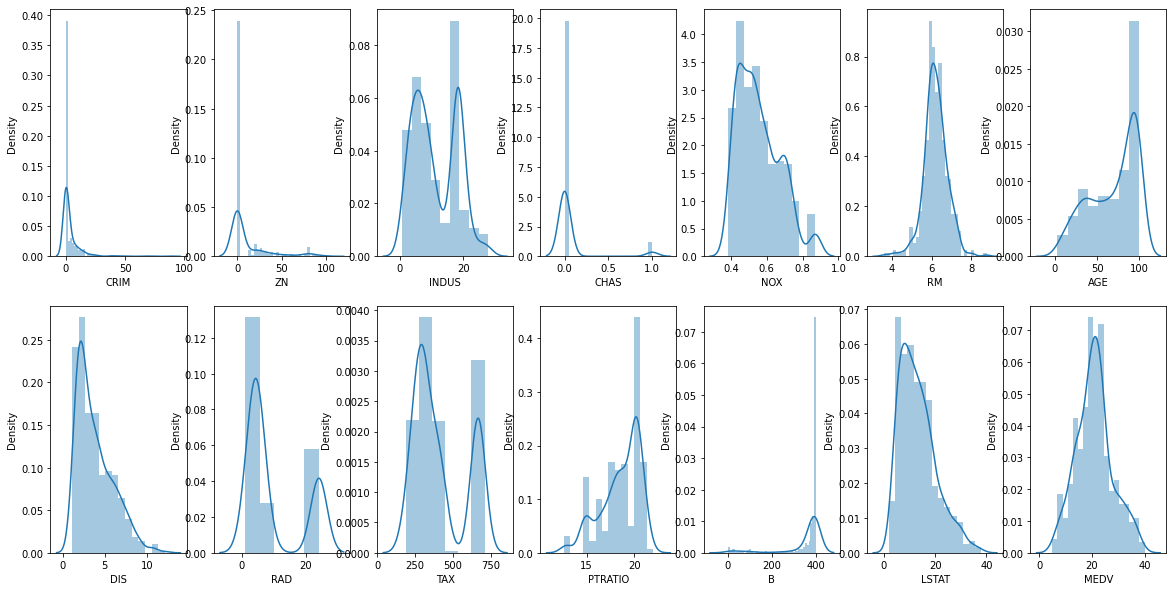

In [41]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
idx = 0
ax = ax.flatten()
for i,j in data.items():
    sns.distplot(j, ax=ax[idx])
    idx += 1
plt.show()

- Bisa dilihat bahwa target variable kita juga sudah cukup ternormalisasi

## Checking Correlation

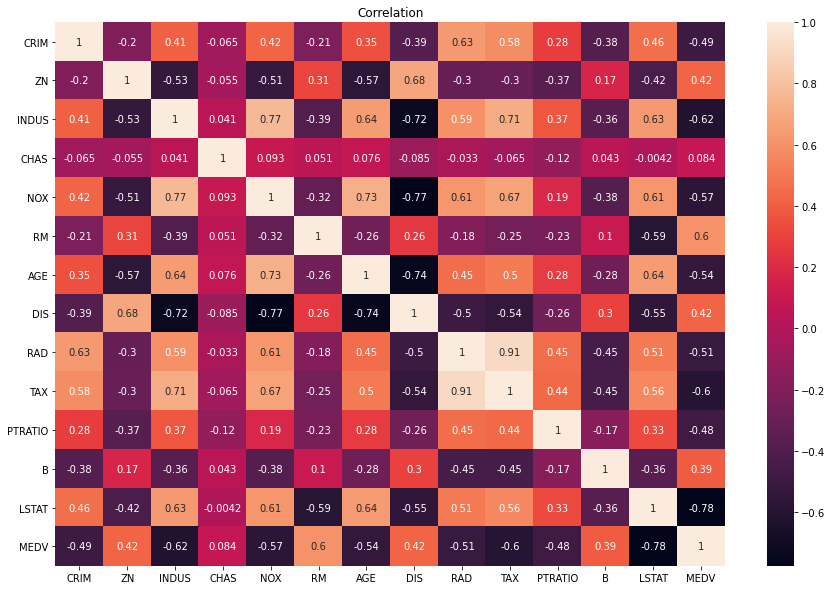

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

- Kita akan mengambil features yang kuat korelasinya dengan target (>= 0.5) (LSTAT, TAX, RAD, AGE, RM, NOX, INDUS)

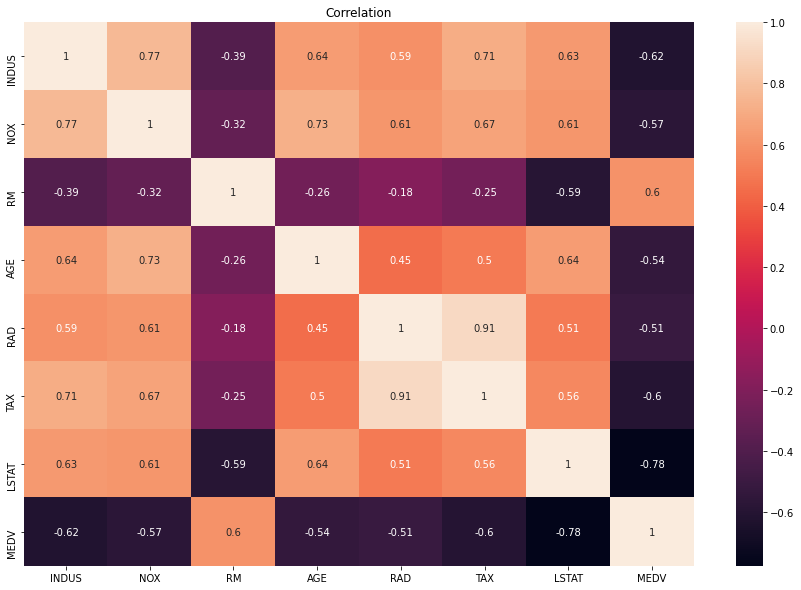

In [43]:
data = data[['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX','LSTAT', 'MEDV']]
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

- Feature RAD dan TAX memiliki korelasi yang tinggi, kita perlu drop salah satu, dan karena TAX memiliki korelasi tinggi dengan target, maka kita bisa drop RAD.

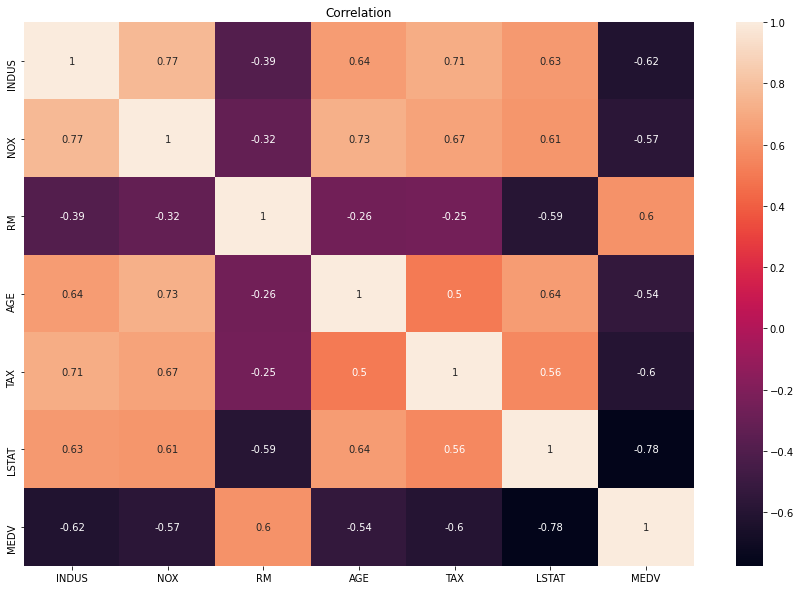

In [44]:
data = data[['INDUS', 'NOX', 'RM', 'AGE', 'TAX','LSTAT', 'MEDV']]
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [45]:
data.head()

,INDUS,NOX,RM,AGE,TAX,LSTAT,MEDV
0,2.31,0.538,6.575,65.2,296.0,4.98,24.0
1,7.07,0.469,6.421,78.9,242.0,9.14,21.6
2,7.07,0.469,7.185,61.1,242.0,4.03,34.7
3,2.18,0.458,6.998,45.8,222.0,2.94,33.4
4,2.18,0.458,7.147,54.2,222.0,5.33,36.2


## Standardizing Data

In [46]:
features = ['INDUS', 'NOX', 'RM', 'AGE', 'TAX','LSTAT']
target = 'MEDV'
X = data[features]
y = data[target]
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
data.shape

(475, 7)

In [48]:
X_train = X[0:380]
X_test = X[380:]
y_train = y[0:380]
y_test = y[380:]

In [58]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (380, 6)
Shape of X_test = (95, 6)
Shape of y_train = (380,)
Shape of y_test = (95,)


## Modelling

In [93]:
def y_predict(weight, X, intercept):
    predicted_list = []
    for i in range(len(X)):
        predicted_list.append(np.dot(weight,X[i])+intercept)
    return np.array(predicted_list)

def MSE_loss_function(Y, Y_pred):
    length = len(Y)
    sum_value = np.sum(Y_pred - Y)
    return (1/length)*sum_value

def derivative_weight(X, Y, Y_pred):
    length = len(Y)
    sum_value = np.dot((Y_pred - Y), X)
    return (2/length)*sum_value

def derivative_bias(Y, Y_pred):
    length = len(Y)
    sum_value = np.sum(Y_pred - Y)
    return (2/length)*sum_value

def Gradient_Descent(X, Y):
    weight = np.random.randn(X.shape[1])
    intercept = 0
    epochs = 4000
    learning_rate = 0.01
    loss = []

    for _ in range(epochs):
        Y_pred = y_predict(weight, X, intercept)
        weight = weight - learning_rate * derivative_weight(X, Y, Y_pred)
        intercept = intercept - learning_rate * derivative_bias(Y, Y_pred)
        loss.append(MSE_loss_function(Y, Y_pred))
    
    # Plotting loss over epochs
    plt.plot(np.arange(1, epochs), loss[1:])
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")

    return weight, intercept

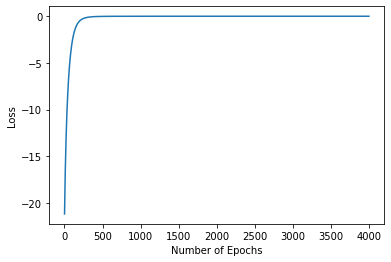

In [94]:
W, B= Gradient_Descent(X_train,y_train)

In [95]:
print(f'Weight : {W}')
print(f'Bias : {B}')

Weight : [-0.69057077  0.72002647  2.22463367 -0.28024836 -1.73033618 -2.75252322]
Bias : 21.029389626749406


## Prediction

In [96]:
def prediction(X_input):
    list = []
    for i in range(len(X_input)):
        list.append(np.dot(W,X_input[i]) + B)
    return np.array(list)

In [97]:
test_pred = prediction(X_test)

In [98]:
y_test = y_test.reset_index(drop=True)
dataFrame_prediction = pd.DataFrame({
    'Ground Truth' : y_test,
    'Prediction' : np.round(test_pred, 2)
})

dataFrame_prediction

,Ground Truth,Prediction
0,17.2,16.25
1,17.9,3.48
2,16.3,11.07
3,7.0,2.64
4,7.2,12.84
...,...,...
90,22.4,25.37
91,20.6,23.75
92,23.9,28.17
93,22.0,27.17


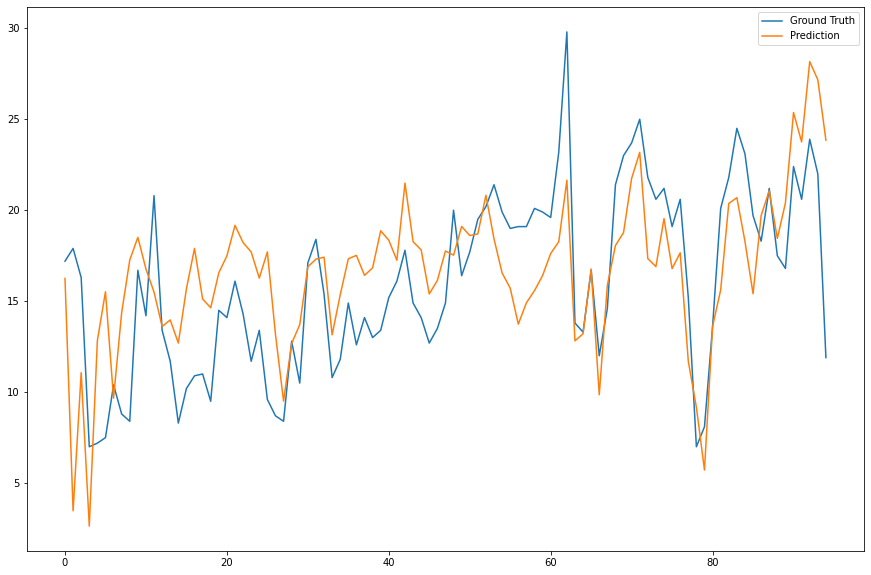

In [99]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(0,95), dataFrame_prediction['Ground Truth'], label='Ground Truth')
plt.plot(np.arange(0,95), dataFrame_prediction['Prediction'], label = 'Prediction')
plt.legend()
plt.show()

## Model Evaluation

In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_pred)
print(r2)
print(MSE_loss_function(y_test, test_pred))

0.27788100508147096
0.6143165851348542
